In [63]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data, DataLoader
import networkx as nx
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [64]:
from torch_geometric.datasets import *
from torch_geometric.utils import to_networkx

data = []

data.append(to_networkx(KarateClub().data))
# data.append(to_networkx(TUDataset(root='./TUDataset', name='PROTEINS').data))
# data.append(to_networkx(GNNBenchmarkDataset(root='./GNNBenchmarkDataset', name='MNIST').data))
data.append(to_networkx(Planetoid(root='./Planetoid', name='Cora').data))
data.append(to_networkx(NELL(root='./NELL').data))
data.append(to_networkx(CitationFull(root='./CitationFull', name='Cora').data))
data.append(to_networkx(CoraFull(root='./CoraFull').data))
# data.append(to_networkx(Coauthor(root='./Coauthor', name='CS').data))
# data.append(to_networkx(Amazon(root='./Amazon', name='Computers').data))
data.append(to_networkx(PPI(root='./PPI').data))
# data.append(to_networkx(Reddit(root='./Reddit').data))
# data.append(to_networkx(Reddit2(root='./Reddit2').data))
# data.append(to_networkx(Flickr(root='./Flickr').data))
# data.append(to_networkx(Yelp(root='./Yelp').data))
# data.append(to_networkx(AmazonProducts(root='./AmazonProducts').data))
data.append(to_networkx(QM7b(root='./QM7b').data))
# data.append(to_networkx(QM9(root='./QM9').data))
# data.append(to_networkx(MD17(root='./MD17').data))
# data.append(to_networkx(ZINC(root='./ZINC').data))
data.append(to_networkx(AQSOL(root='./AQSOL').data))
# data.append(to_networkx(MoleculeNet(root='./MoleculeNet', name='ESOL').data))
# data.append(to_networkx(PCQM4Mv2(root='./PCQM4Mv2').data))
# data.append(to_networkx(Entities(root='./Entities', name='AIFB').data))
data.append(to_networkx(RelLinkPredDataset(root='./RelLinkPredDataset', name='FB15k-237').data))
# data.append(to_networkx(GEDDataset(root='./GEDDataset', name='LINUX').data))
# data.append(to_networkx(AttributedGraphDataset(root='./AttributedGraphDataset').data))
# data.append(to_networkx(MNISTSuperpixels(root='./MNISTSuperpixels').data))
# data.append(to_networkx(FAUST(root='./FAUST').data))
# data.append(to_networkx(DynamicFAUST(root='./DynamicFAUST').data))
# data.append(to_networkx(ShapeNet(root='./ShapeNet').data))
# data.append(to_networkx(ModelNet(root='./ModelNet').data))
# data.append(to_networkx(CoMA(root='./CoMA').data))
# data.append(to_networkx(SHREC2016(root='./SHREC2016').data))
#data.append(to_networkx(TOSCA(root='./TOSCA').data))
#data.append(to_networkx(PCPNetDataset(root='./PCPNetDataset').data))
#data.append(to_networkx(S3DIS(root='./S3DIS').data))
#data.append(to_networkx(GeometricShapes(root='./GeometricShapes').data))
data.append(to_networkx(BitcoinOTC(root='./BitcoinOTC').data))
data.append(to_networkx(GDELTLite(root='./GDELTLite').data))
#data.append(to_networkx(ICEWS18(root='./ICEWS18').data))
# data.append(to_networkx(GDELT(root='./GDELT').data))
# data.append(to_networkx(WILLOWObjectClass(root='./WILLOWObjectClass').data))
# data.append(to_networkx(PascalVOCKeypoints(root='./PascalVOCKeypoints').data))
# data.append(to_networkx(PascalPF(root='./PascalPF').data))
"""data.append(to_networkx(SNAPDataset(root='./SNAPDataset').data))
data.append(to_networkx(SuiteSparseMatrixCollection(root='./SuiteSparseMatrixCollection').data))
data.append(to_networkx(WordNet18(root='./WordNet18').data))
data.append(to_networkx(WordNet18RR(root='./WordNet18RR').data))
data.append(to_networkx(FB15k_237(root='./FB15k_237').data))
data.append(to_networkx(WikiCS(root='./WikiCS').data))
data.append(to_networkx(WebKB(root='./WebKB').data))
data.append(to_networkx(WikipediaNetwork(root='./WikipediaNetwork').data))
data.append(to_networkx(HeterophilousGraphDataset(root='./HeterophilousGraphDataset').data))
data.append(to_networkx(Actor(root='./Actor').data))
data.append(to_networkx(UPFD(root='./UPFD').data))
data.append(to_networkx(GitHub(root='./GitHub').data))
data.append(to_networkx(FacebookPagePage(root='./FacebookPagePage').data))
data.append(to_networkx(LastFMAsia(root='./LastFMAsia').data))
data.append(to_networkx(DeezerEurope(root='./DeezerEurope').data))
data.append(to_networkx(GemsecDeezer(root='./GemsecDeezer').data))
data.append(to_networkx(Twitch(root='./Twitch').data))
data.append(to_networkx(Airports(root='./Airports').data))
data.append(to_networkx(LRGBDataset(root='./LRGBDataset').data))
data.append(to_networkx(MalNetTiny(root='./MalNetTiny').data))
data.append(to_networkx(OMDB(root='./OMDB').data))
data.append(to_networkx(PolBlogs(root='./PolBlogs').data))
data.append(to_networkx(EmailEUCore(root='./EmailEUCore').data))
data.append(to_networkx(LINKXDataset(root='./LINKXDataset').data))
data.append(to_networkx(EllipticBitcoinDataset(root='./EllipticBitcoinDataset').data))
data.append(to_networkx(EllipticBitcoinTemporalDataset(root='./EllipticBitcoinTemporalDataset').data))
data.append(to_networkx(DGraphFin(root='./DGraphFin').data))
data.append(to_networkx(HydroNet(root='./HydroNet').data))
data.append(to_networkx(AirfRANS(root='./AirfRANS').data))
data.append(to_networkx(JODIEDataset(root='./JODIEDataset').data))
data.append(to_networkx(Wikidata5M(root='./Wikidata5M').data))
data.append(to_networkx(MyketDataset(root='./MyketDataset').data))
data.append(to_networkx(BrcaTcga(root='./BrcaTcga').data))
data.append(to_networkx(NeuroGraphDataset(root='./NeuroGraphDataset').data))
data.append(to_networkx(DBP15K(root='./DBP15K').data))
data.append(to_networkx(AMiner(root='./AMiner').data))
data.append(to_networkx(OGB_MAG(root='./OGB_MAG').data))
data.append(to_networkx(DBLP(root='./DBLP').data))
data.append(to_networkx(MovieLens(root='./MovieLens').data))
data.append(to_networkx(MovieLens100K(root='./MovieLens100K').data))
data.append(to_networkx(MovieLens1M(root='./MovieLens1M').data))
data.append(to_networkx(IMDB(root='./IMDB').data))
data.append(to_networkx(LastFM(root='./LastFM').data))
data.append(to_networkx(HGBDataset(root='./HGBDataset').data))
data.append(to_networkx(Taobao(root='./Taobao').data))
data.append(to_networkx(IGMCDataset(root='./IGMCDataset').data))"""
data.append(to_networkx(AmazonBook(root='./AmazonBook').data))
# data.append(to_networkx(HM(root='./HM').data))
data.append(to_networkx(OSE_GVCS(root='./OSE_GVCS').data))
"""data.append(to_networkx(RCDD(root='./RCDD').data))
data.append(to_networkx(FakeDataset(root='./FakeDataset').data))
data.append(to_networkx(FakeHeteroDataset(root='./FakeHeteroDataset').data))
data.append(to_networkx(StochasticBlockModelDataset(root='./StochasticBlockModelDataset').data))
data.append(to_networkx(RandomPartitionGraphDataset(root='./RandomPartitionGraphDataset').data))
data.append(to_networkx(MixHopSyntheticDataset(root='./MixHopSyntheticDataset').data))
data.append(to_networkx(ExplainerDataset(root='./ExplainerDataset').data))
data.append(to_networkx(InfectionDataset(root='./InfectionDataset').data))
data.append(to_networkx(BA2MotifDataset(root='./BA2MotifDataset').data))
data.append(to_networkx(BAMultiShapesDataset(root='./BAMultiShapesDataset').data))
data.append(to_networkx(BAShapes(root='./BAShapes').data))"""

"data.append(to_networkx(RCDD(root='./RCDD').data))\ndata.append(to_networkx(FakeDataset(root='./FakeDataset').data))\ndata.append(to_networkx(FakeHeteroDataset(root='./FakeHeteroDataset').data))\ndata.append(to_networkx(StochasticBlockModelDataset(root='./StochasticBlockModelDataset').data))\ndata.append(to_networkx(RandomPartitionGraphDataset(root='./RandomPartitionGraphDataset').data))\ndata.append(to_networkx(MixHopSyntheticDataset(root='./MixHopSyntheticDataset').data))\ndata.append(to_networkx(ExplainerDataset(root='./ExplainerDataset').data))\ndata.append(to_networkx(InfectionDataset(root='./InfectionDataset').data))\ndata.append(to_networkx(BA2MotifDataset(root='./BA2MotifDataset').data))\ndata.append(to_networkx(BAMultiShapesDataset(root='./BAMultiShapesDataset').data))\ndata.append(to_networkx(BAShapes(root='./BAShapes').data))"

In [65]:
# CREATE SKELETON
def hash_connectivity(graph, node):
    incoming = tuple(sorted([n for n in graph.predecessors(node)]))
    outgoing = tuple(sorted([n for n in graph.successors(node)]))
    return hash((incoming, outgoing))

def group_nodes(graph):
    groups = {}
    for node in graph.nodes():
        h = hash_connectivity(graph, node)
        if h not in groups:
            groups[h] = []
        groups[h].append(node)
    return groups

def filter(graph):
    groups = group_nodes(graph)
    skeleton_graph = nx.DiGraph()
    for nodes in groups.values():
        retained_node = nodes[0]
        skeleton_graph.add_node(retained_node)
        for successor in graph.successors(retained_node):
            if successor in skeleton_graph.nodes:
                skeleton_graph.add_edge(retained_node, successor)
        for predecessor in graph.predecessors(retained_node):
            if predecessor in skeleton_graph.nodes:
                skeleton_graph.add_edge(predecessor, retained_node)
    print(f"Original: {skeleton_graph.number_of_nodes()} nodes; Skeleton: {skeleton_graph.number_of_nodes()} nodes")
    return skeleton_graph

def create_skeleton(graph):
    return filter(graph)

In [67]:
# GROUND TRUTH DATA

graphs = []
skeletons = []
for G in data:
    graphs.append(nx.to_dict_of_lists(G))
    skeletons.append(nx.to_dict_of_lists(create_skeleton(G)))

Number of nodes in original graph: 34
Number of nodes in skeleton graph: 29
Number of nodes in original graph: 2708
Number of nodes in skeleton graph: 2581
Number of nodes in original graph: 65755
Number of nodes in skeleton graph: 9903
Number of nodes in original graph: 19793
Number of nodes in skeleton graph: 18635
Number of nodes in original graph: 19793
Number of nodes in skeleton graph: 18635
Number of nodes in original graph: 44906
Number of nodes in skeleton graph: 3481
Number of nodes in original graph: 111180
Number of nodes in skeleton graph: 2
Number of nodes in original graph: 120833
Number of nodes in skeleton graph: 157
Number of nodes in original graph: 14541
Number of nodes in skeleton graph: 14022
Number of nodes in original graph: 828690
Number of nodes in skeleton graph: 4366
Number of nodes in original graph: 16682
Number of nodes in skeleton graph: 7833
Number of nodes in original graph: 144242
Number of nodes in skeleton graph: 144008
Number of nodes in original g

In [68]:
# REFORMATTING

# Create labels for the nodes indicating whether they are included (1) or not included (0) in the skeleton
def convert_to_edge_index(graph, skeleton):
    all_nodes = set(graph.keys()).union(set(skeleton.keys()))
    for neighbors in graph.values():
        all_nodes.update(neighbors)
    for neighbors in skeleton.values():
        all_nodes.update(neighbors)
    
    nodes = list(all_nodes)
    node_index = {node: i for i, node in enumerate(nodes)}
    
    edge_index = []
    labels = torch.zeros(len(nodes), dtype=torch.float)

    for node in nodes:
        if node in graph:
            if node in skeleton:
                labels[node_index[node]] = 1.0 
            else:
                labels[node_index[node]] = 0.0

    for node, neighbors in graph.items():
        for neighbor in neighbors:
            edge_index.append([node_index[node], node_index[neighbor]])

    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    
    x = torch.randn(len(nodes), 4)  
    return edge_index, labels, x

data_list = []
for graph, skeleton in zip(graphs, skeletons):
    edge_index, labels, x = convert_to_edge_index(graph, skeleton)
    data_list.append(Data(x=x, edge_index=edge_index, y=labels))

train_data, test_data = train_test_split(data_list, test_size=0.3, random_state=42)

train_loader = DataLoader(train_data, batch_size=1, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1, shuffle=False)


/Users/alexandrakim/opt/anaconda3/envs/drisk/lib/python3.12/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [69]:
class GNNModel(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return torch.sigmoid(x)


Epoch 1, Loss: 0.747662259472741
Epoch 2, Loss: 0.6908942527241178
Epoch 3, Loss: 0.6914944450060526
Epoch 4, Loss: 0.6603317128287421
Epoch 5, Loss: 0.6695393787489997
Epoch 6, Loss: 0.6429265737533569
Epoch 7, Loss: 0.6344919006029764
Epoch 8, Loss: 0.6258594128820631
Epoch 9, Loss: 0.6199159555964999
Epoch 10, Loss: 0.6194496750831604
Epoch 11, Loss: 0.6011602746115791
Epoch 12, Loss: 0.596176995171441
Epoch 13, Loss: 0.5875806709130605
Epoch 14, Loss: 0.5791287057929568
Epoch 15, Loss: 0.5684298243787553
Epoch 16, Loss: 0.5653335849444071
Epoch 17, Loss: 0.5530113048023648
Epoch 18, Loss: 0.5419605208767785
Epoch 19, Loss: 0.5357744097709656
Epoch 20, Loss: 0.5403047071562873
Epoch 21, Loss: 0.5232638054423862
Epoch 22, Loss: 0.5125540892283121
Epoch 23, Loss: 0.5079528556929694
Epoch 24, Loss: 0.5008017851246728
Epoch 25, Loss: 0.4978225264284346
Epoch 26, Loss: 0.5011641979217529
Epoch 27, Loss: 0.48666099376148647
Epoch 28, Loss: 0.48030968175994027
Epoch 29, Loss: 0.48059672779

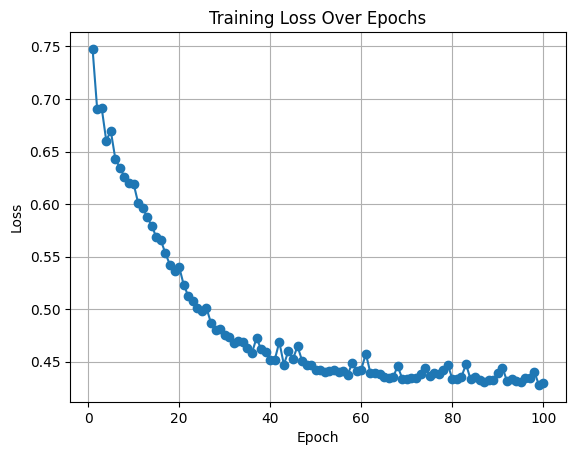

In [73]:
# TRAINING

model = GNNModel(input_dim=4, hidden_dim=16, output_dim=1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.BCELoss()

losses = []

for epoch in range(100):
    model.train()
    epoch_loss = 0
    for data in train_loader:
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out.squeeze(), data.y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    average_loss = epoch_loss / len(train_loader)
    losses.append(average_loss)
    print(f'Epoch {epoch+1}, Loss: {average_loss}')

plt.plot(range(1, 101), losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.show()

In [74]:
# TESTING
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        pred = model(data)
        pred_labels = (pred.squeeze() > 0.5).float()
        
        # Compare predictions with true labels
        correct += (pred_labels == data.y).sum().item()
        total += data.y.size(0)

# Calculate accuracy
accuracy = correct / total
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 87.93%
